In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


# Step 1 : Column Explaining

The dataset contains 8,763 rows and 26 columns.



1.   Patient ID - Unique identifier for each patient
2.   Age - Age of the patient
3. Sex - Gender of the patient (Male/Female)
4. Cholesterol - Cholesterol levels of the patient
5. Blood Pressure - Blood pressure of the patient (systolic/diastolic)
6. Heart Rate - Heart rate of the patient
7. Diabetes - Whether the patient has diabetes (Yes/No)
8. Family History - Family history of heart-related problems (1: Yes, 0: No)
9. Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)
10. Obesity - Obesity status of the patient (1: Obese, 0: Not obese)
11. Alcohol Consumption - Level of alcohol consumption by the patient (None/12. Light/Moderate/Heavy)
13. Exercise Hours Per Week - Number of exercise hours per week
14. Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)
15. Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)
16. Medication Use - Medication usage by the patient (1: Yes, 0: No)
17. Stress Level - Stress level reported by the patient (1-10)
18. Sedentary Hours Per Day - Hours of sedentary activity per day
19. Income - Income level of the patient
20. BMI - Body Mass Index (BMI) of the patient
21. Triglycerides - Triglyceride levels of the patient
22. Physical Activity Days Per Week - Days of physical activity per week
23. Sleep Hours Per Day - Hours of sleep per day
24. Country - Country of the patient
25. Continent - Continent where the patient resides
26. Hemisphere - Hemisphere where the patient resides

And for the target variable:

**Heart Attack Risk** - Presence of heart attack risk (1: Yes, 0: No)

*NOTE*: Per request, we will not use **Country & Continent** columns in this project.

In [ ]:
df.drop(['Country','Continent','Patient ID'], axis=1, inplace=True)
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,1,8,10.806373,235420,19.655895,67,7,7,Northern Hemisphere,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,0,8,3.833038,217881,23.993866,617,4,9,Northern Hemisphere,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,0,5,2.375214,36998,35.406146,527,4,4,Southern Hemisphere,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,1,5,0.029104,209943,27.294020,114,2,8,Southern Hemisphere,0


# Step 2: Data Understanding
  * Dataframe shape
  * head
  * dtypes
  * info
  * describe

In [ ]:
df.shape

(8763, 23)

In [ ]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Northern Hemisphere,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [ ]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64


In [ ]:
df.nunique()

,0
Age,73
Sex,2
Cholesterol,281
Blood Pressure,3915
Heart Rate,71
Diabetes,2
Family History,2
Smoking,2
Obesity,2
Alcohol Consumption,2


In [ ]:
## No NULL Values - no need to complete missing values
df.isnull().sum()

,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0
Alcohol Consumption,0


In [ ]:
# No duplicated rows
df.duplicated().sum()

0

# Step 3 : EDA

In [ ]:
# Handling Blood Pressure Column

df['Systolic Pressure']  = pd.to_numeric(df['Blood Pressure'].str.split('/').str[0])
df['Diastolic Pressure']  = pd.to_numeric(df['Blood Pressure'].str.split('/').str[1])

df.drop('Blood Pressure' , axis=1 , inplace = True)
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,4.963459,285768,27.194973,235,1,7,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,9.463426,235282,28.176571,587,4,4,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,7.648981,125640,36.464704,378,3,4,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1.514821,160555,21.809144,231,1,5,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,10.806373,235420,19.655895,67,7,7,Northern Hemisphere,0,94,76
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,3.833038,217881,23.993866,617,4,9,Northern Hemisphere,0,157,102
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,2.375214,36998,35.406146,527,4,4,Southern Hemisphere,1,161,75
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,0.029104,209943,27.294020,114,2,8,Southern Hemisphere,0,119,67


<ipython-input-16-083f4a2497ba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x= 'Heart Attack Risk'  ,palette='Set1')


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

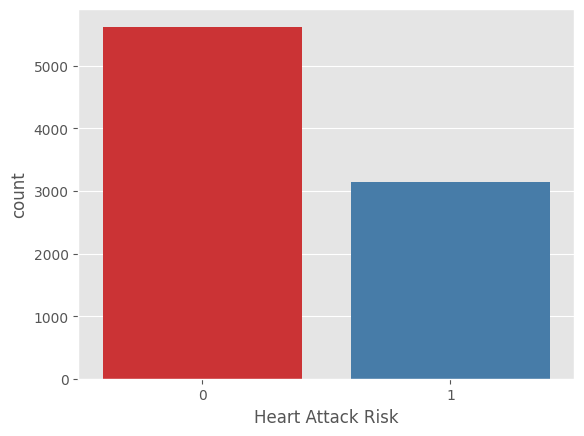

In [ ]:
sns.countplot(data = df , x= 'Heart Attack Risk'  ,palette='Set1')

Target Value is slighlty imbalanced

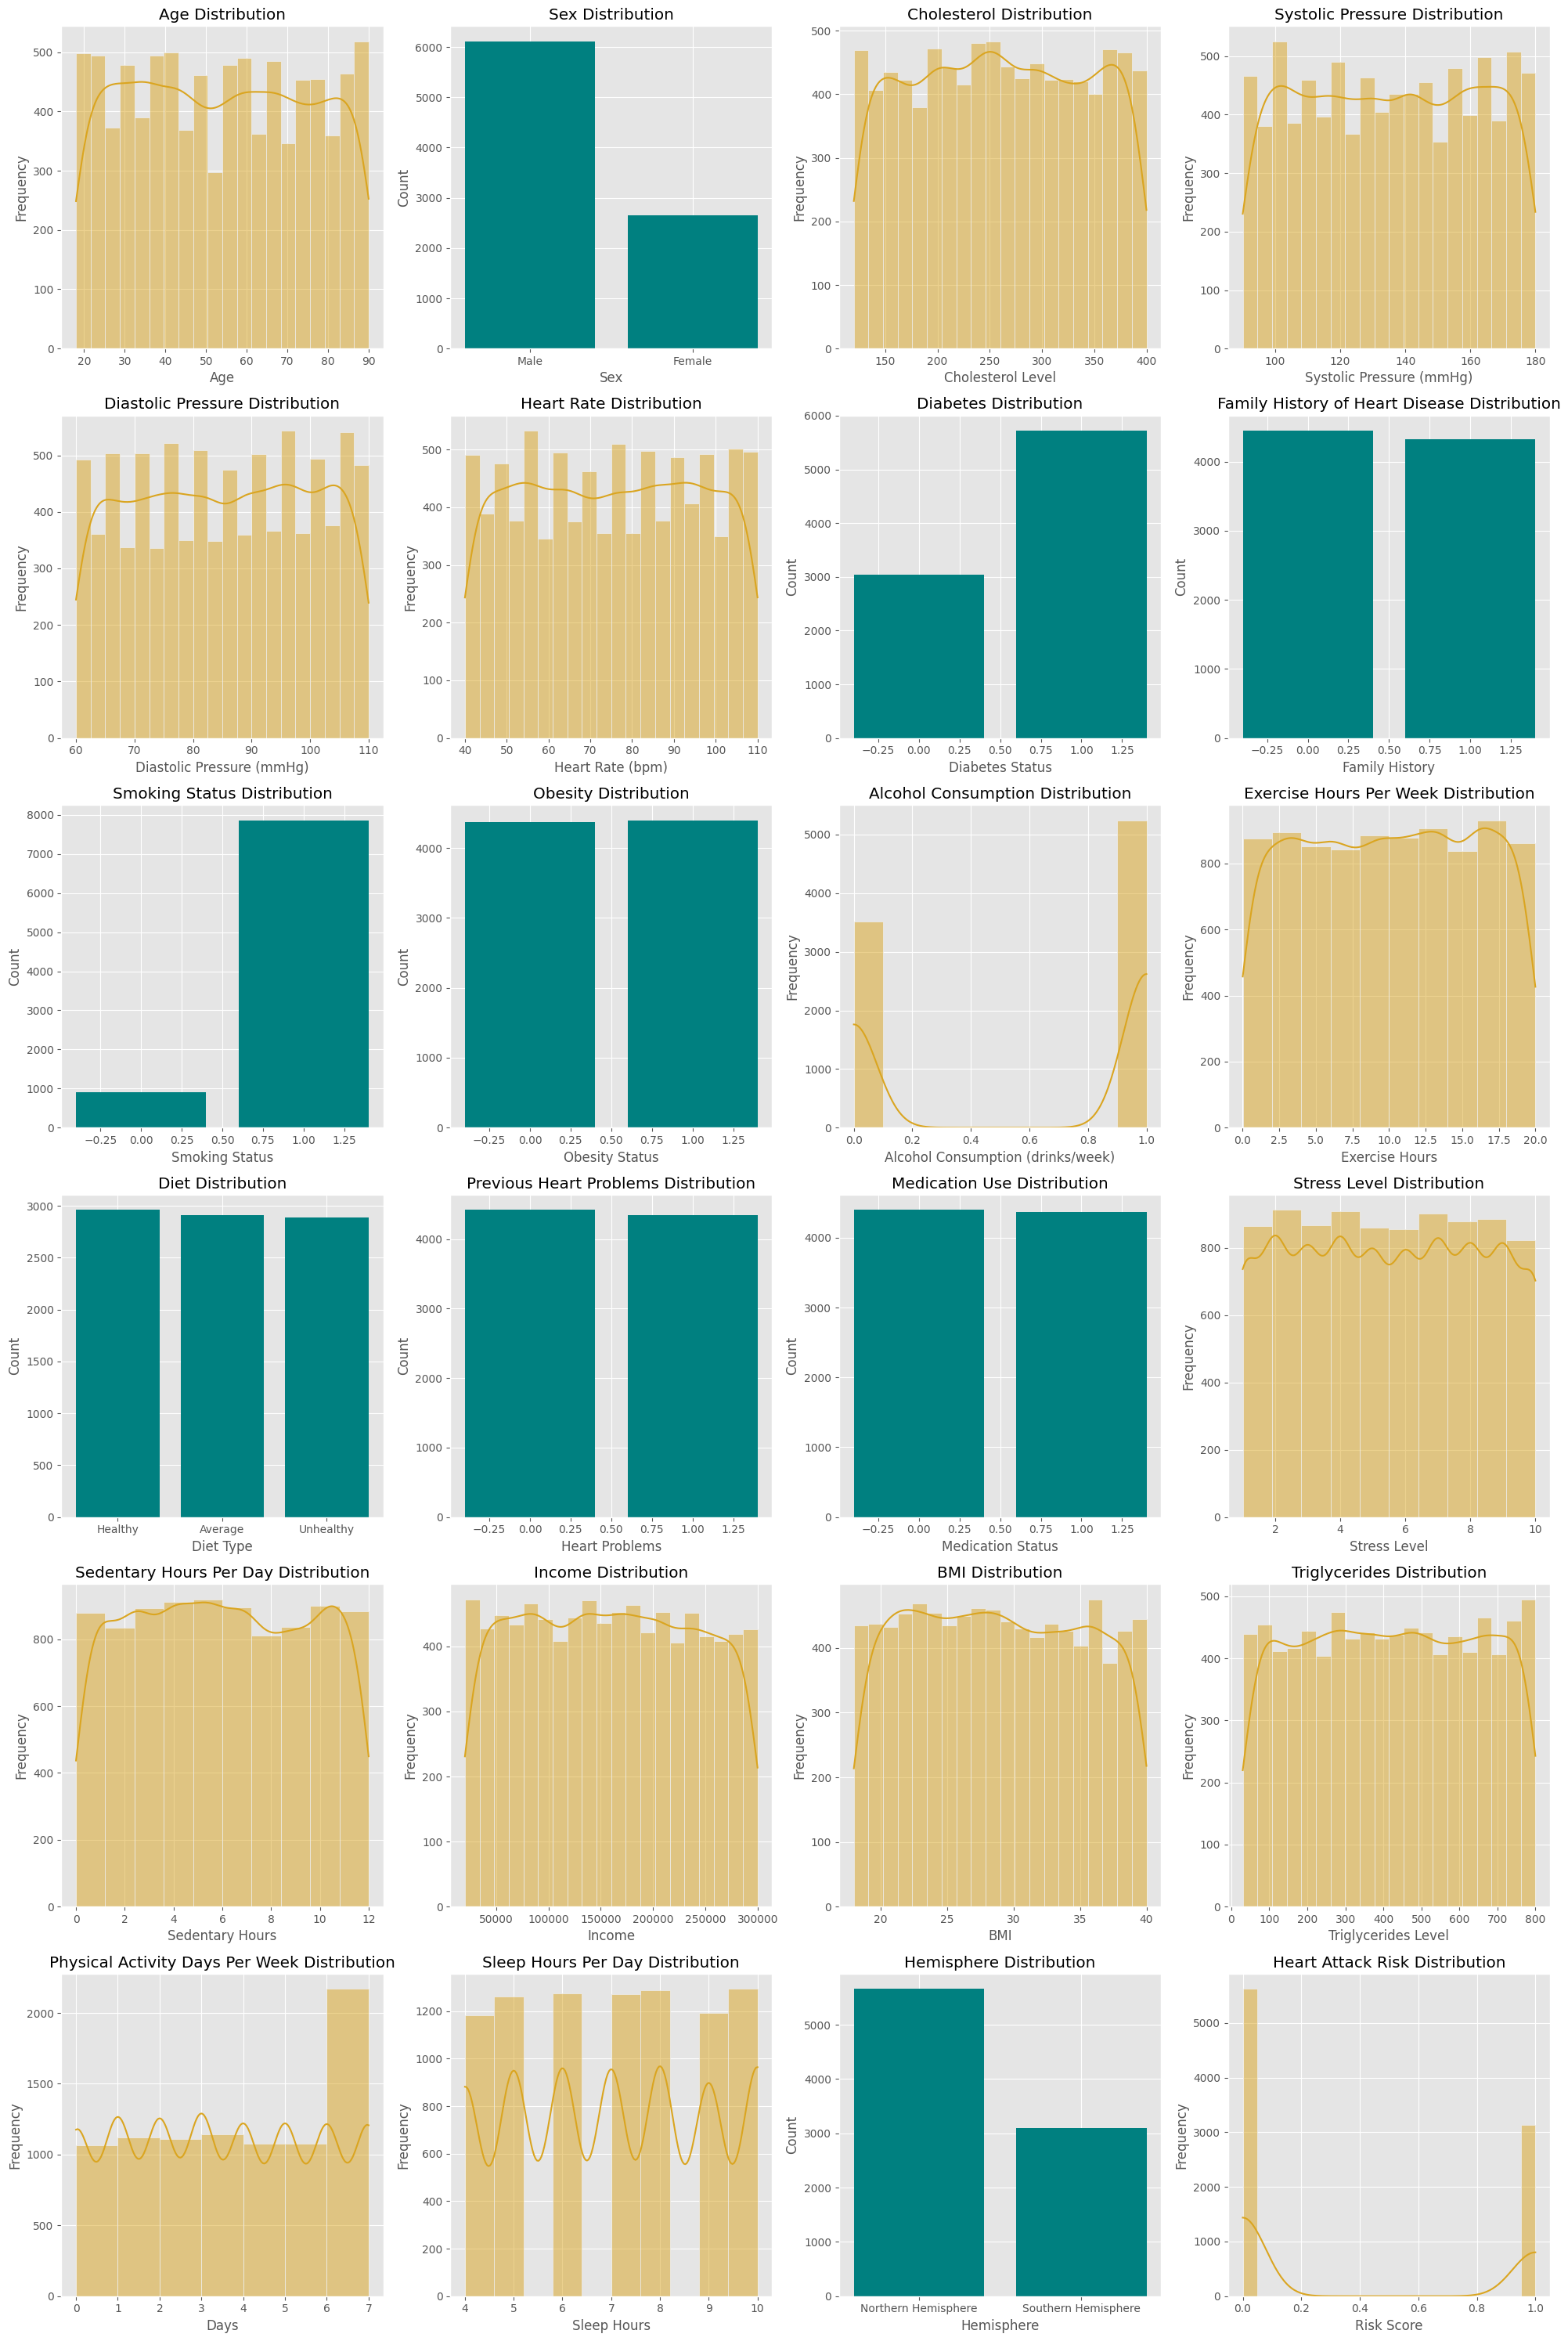

In [ ]:
# Feature Visualization for Health-related Data
fig, axes = plt.subplots(6, 4, figsize=(20, 30))  # Adjusted for 24 features

# Age Distribution
sns.histplot(data=df, x='Age', bins=20, kde=True, color='goldenrod', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Sex Distribution
sex_counts = df['Sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values, color='teal')
axes[0, 1].set_title('Sex Distribution')
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Count')

# Cholesterol Distribution
sns.histplot(data=df, x='Cholesterol', bins=20, kde=True, color='goldenrod', ax=axes[0, 2])
axes[0, 2].set_title('Cholesterol Distribution')
axes[0, 2].set_xlabel('Cholesterol Level')
axes[0, 2].set_ylabel('Frequency')

# Systolic Pressure Distribution
sns.histplot(data=df, x='Systolic Pressure', bins=20, kde=True, color='goldenrod', ax=axes[0, 3])
axes[0, 3].set_title('Systolic Pressure Distribution')
axes[0, 3].set_xlabel('Systolic Pressure (mmHg)')
axes[0, 3].set_ylabel('Frequency')

# Diastolic Pressure Distribution
sns.histplot(data=df, x='Diastolic Pressure', bins=20, kde=True, color='goldenrod', ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Pressure Distribution')
axes[1, 0].set_xlabel('Diastolic Pressure (mmHg)')
axes[1, 0].set_ylabel('Frequency')

# Heart Rate Distribution
sns.histplot(data=df, x='Heart Rate', bins=20, kde=True, color='goldenrod', ax=axes[1, 1])
axes[1, 1].set_title('Heart Rate Distribution')
axes[1, 1].set_xlabel('Heart Rate (bpm)')
axes[1, 1].set_ylabel('Frequency')

# Diabetes Distribution
diabetes_counts = df['Diabetes'].value_counts()
axes[1, 2].bar(diabetes_counts.index, diabetes_counts.values, color='teal')
axes[1, 2].set_title('Diabetes Distribution')
axes[1, 2].set_xlabel('Diabetes Status')
axes[1, 2].set_ylabel('Count')

# Family History Distribution
family_history_counts = df['Family History'].value_counts()
axes[1, 3].bar(family_history_counts.index, family_history_counts.values, color='teal')
axes[1, 3].set_title('Family History of Heart Disease Distribution')
axes[1, 3].set_xlabel('Family History')
axes[1, 3].set_ylabel('Count')

# Smoking Status Distribution
smoking_counts = df['Smoking'].value_counts()
axes[2, 0].bar(smoking_counts.index, smoking_counts.values, color='teal')
axes[2, 0].set_title('Smoking Status Distribution')
axes[2, 0].set_xlabel('Smoking Status')
axes[2, 0].set_ylabel('Count')

# Obesity Distribution
obesity_counts = df['Obesity'].value_counts()
axes[2, 1].bar(obesity_counts.index, obesity_counts.values, color='teal')
axes[2, 1].set_title('Obesity Distribution')
axes[2, 1].set_xlabel('Obesity Status')
axes[2, 1].set_ylabel('Count')

# Alcohol Consumption Distribution
sns.histplot(data=df, x='Alcohol Consumption', bins=10, kde=True, color='goldenrod', ax=axes[2, 2])
axes[2, 2].set_title('Alcohol Consumption Distribution')
axes[2, 2].set_xlabel('Alcohol Consumption (drinks/week)')
axes[2, 2].set_ylabel('Frequency')

# Exercise Hours Per Week Distribution
sns.histplot(data=df, x='Exercise Hours Per Week', bins=10, kde=True, color='goldenrod', ax=axes[2, 3])
axes[2, 3].set_title('Exercise Hours Per Week Distribution')
axes[2, 3].set_xlabel('Exercise Hours')
axes[2, 3].set_ylabel('Frequency')

# Diet Distribution
diet_counts = df['Diet'].value_counts()
axes[3, 0].bar(diet_counts.index, diet_counts.values, color='teal')
axes[3, 0].set_title('Diet Distribution')
axes[3, 0].set_xlabel('Diet Type')
axes[3, 0].set_ylabel('Count')

# Previous Heart Problems Distribution
previous_heart_problems_counts = df['Previous Heart Problems'].value_counts()
axes[3, 1].bar(previous_heart_problems_counts.index, previous_heart_problems_counts.values, color='teal')
axes[3, 1].set_title('Previous Heart Problems Distribution')
axes[3, 1].set_xlabel('Heart Problems')
axes[3, 1].set_ylabel('Count')

# Medication Use Distribution
medication_use_counts = df['Medication Use'].value_counts()
axes[3, 2].bar(medication_use_counts.index, medication_use_counts.values, color='teal')
axes[3, 2].set_title('Medication Use Distribution')
axes[3, 2].set_xlabel('Medication Status')
axes[3, 2].set_ylabel('Count')

# Stress Level Distribution
sns.histplot(data=df, x='Stress Level', bins=10, kde=True, color='goldenrod', ax=axes[3, 3])
axes[3, 3].set_title('Stress Level Distribution')
axes[3, 3].set_xlabel('Stress Level')
axes[3, 3].set_ylabel('Frequency')

# Sedentary Hours Per Day Distribution
sns.histplot(data=df, x='Sedentary Hours Per Day', bins=10, kde=True, color='goldenrod', ax=axes[4, 0])
axes[4, 0].set_title('Sedentary Hours Per Day Distribution')
axes[4, 0].set_xlabel('Sedentary Hours')
axes[4, 0].set_ylabel('Frequency')

# Income Distribution
sns.histplot(data=df, x='Income', bins=20, kde=True, color='goldenrod', ax=axes[4, 1])
axes[4, 1].set_title('Income Distribution')
axes[4, 1].set_xlabel('Income')
axes[4, 1].set_ylabel('Frequency')

# BMI Distribution
sns.histplot(data=df, x='BMI', bins=20, kde=True, color='goldenrod', ax=axes[4, 2])
axes[4, 2].set_title('BMI Distribution')
axes[4, 2].set_xlabel('BMI')
axes[4, 2].set_ylabel('Frequency')

# Triglycerides Distribution
sns.histplot(data=df, x='Triglycerides', bins=20, kde=True, color='goldenrod', ax=axes[4, 3])
axes[4, 3].set_title('Triglycerides Distribution')
axes[4, 3].set_xlabel('Triglycerides Level')
axes[4, 3].set_ylabel('Frequency')

# Physical Activity Days Per Week Distribution
sns.histplot(data=df, x='Physical Activity Days Per Week', bins=7, kde=True, color='goldenrod', ax=axes[5, 0])
axes[5, 0].set_title('Physical Activity Days Per Week Distribution')
axes[5, 0].set_xlabel('Days')
axes[5, 0].set_ylabel('Frequency')

# Sleep Hours Per Day Distribution
sns.histplot(data=df, x='Sleep Hours Per Day', bins=10, kde=True, color='goldenrod', ax=axes[5, 1])
axes[5, 1].set_title('Sleep Hours Per Day Distribution')
axes[5, 1].set_xlabel('Sleep Hours')
axes[5, 1].set_ylabel('Frequency')

# Hemisphere Distribution
hemisphere_counts = df['Hemisphere'].value_counts()
axes[5, 2].bar(hemisphere_counts.index, hemisphere_counts.values, color='teal')
axes[5, 2].set_title('Hemisphere Distribution')
axes[5, 2].set_xlabel('Hemisphere')
axes[5, 2].set_ylabel('Count')

# Heart Attack Risk Distribution
sns.histplot(data=df, x='Heart Attack Risk', bins=20, kde=True, color='goldenrod', ax=axes[5, 3])
axes[5, 3].set_title('Heart Attack Risk Distribution')
axes[5, 3].set_xlabel('Risk Score')
axes[5, 3].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<Axes: >

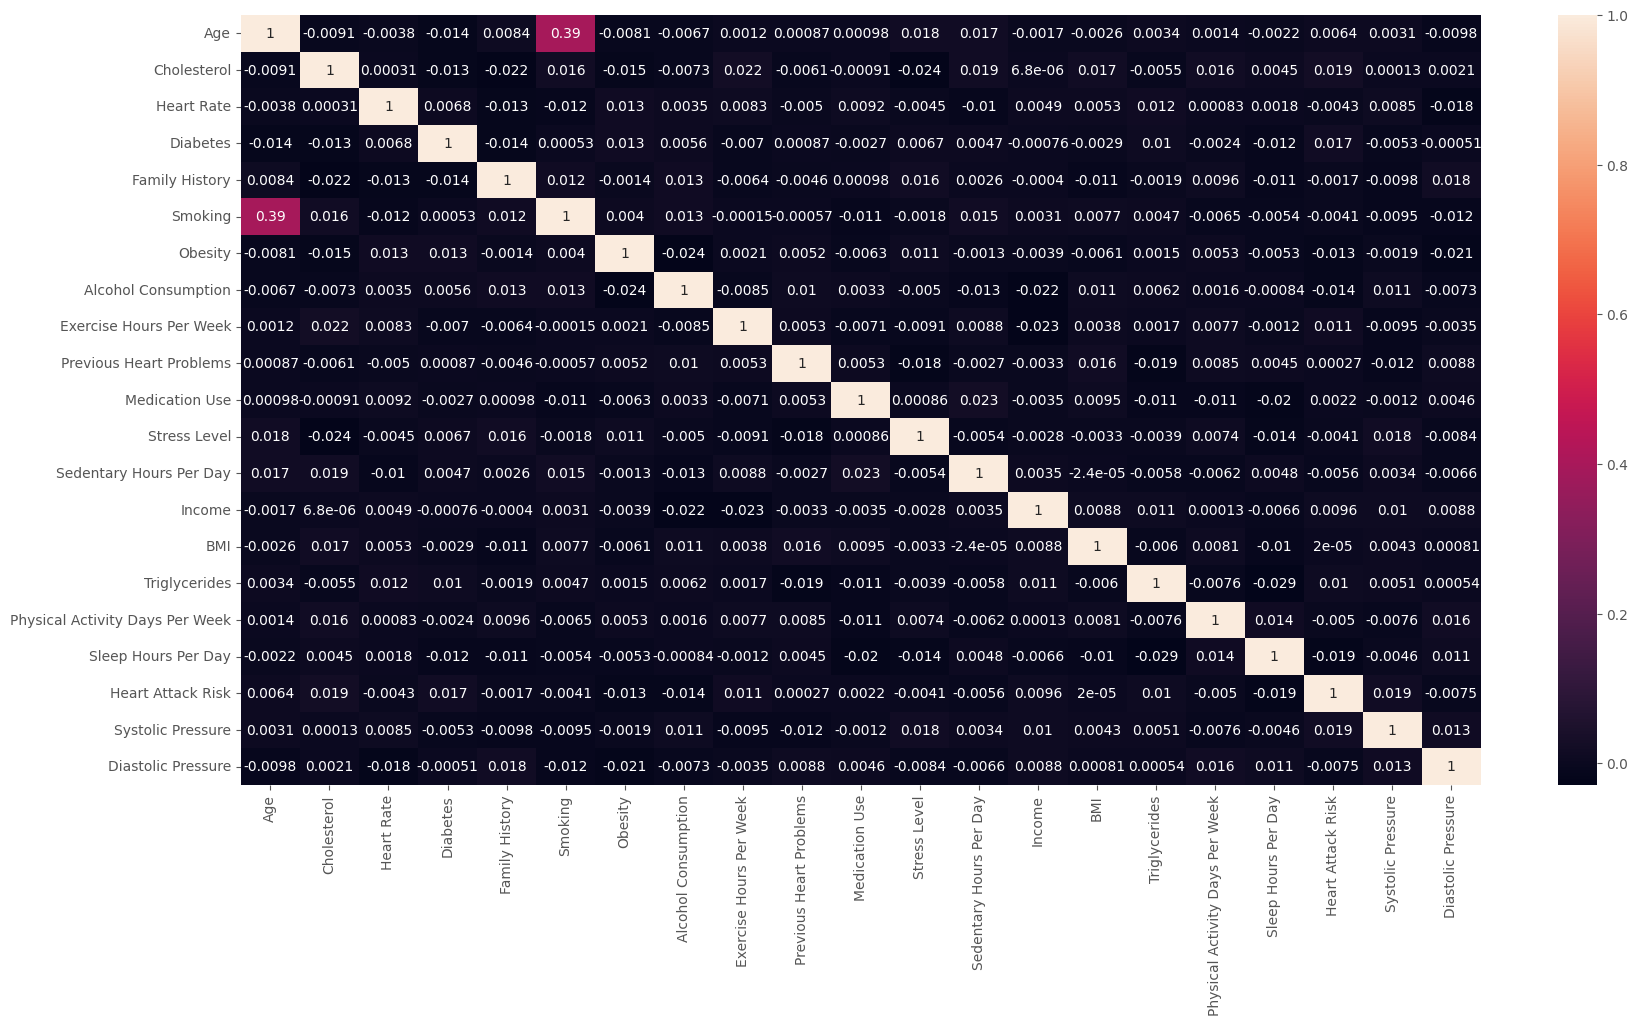

In [ ]:
# heatmapping correlations between columns (without catagorized columns)

plt.figure(figsize=(20 , 10))
sns.heatmap(df.corr(numeric_only = True) , annot=True)

Need To Add more EDA stuff

**Handling Object Columns**

In [ ]:
# Display columns of object data type
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns in the DataFrame:", object_columns)

Object columns in the DataFrame: Index(['Sex', 'Diet', 'Hemisphere'], dtype='object')


In [ ]:
object_cols = df.select_dtypes('object').nunique().sort_values(ascending=False).head(3).index
object_cols

Index(['Diet', 'Sex', 'Hemisphere'], dtype='object')

In [ ]:
for col in object_cols:
    lb = LabelEncoder()
    df[col]=lb.fit_transform(df[col])

In [ ]:
# Check for columns with 'object' data type
object_columns = df.select_dtypes(include='object').columns

# Print message based on the presence of object columns
if object_columns.empty:
    print("There are no Object columns in df")
else:
    print("Object columns:", object_columns)

There are no Object columns in df


# Step 4 : Modeling

In [ ]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Hemisphere',
       'Heart Attack Risk', 'Systolic Pressure', 'Diastolic Pressure'],
      dtype='object')

In [ ]:
# Splitting the data

X = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define classifiers

classifiers = {
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),

    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42))
    ]),

    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(random_state=42))
    ]),

    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
}

Decision Tree - Accuracy: 0.54, Recall: 0.54, F1 Score: 0.55


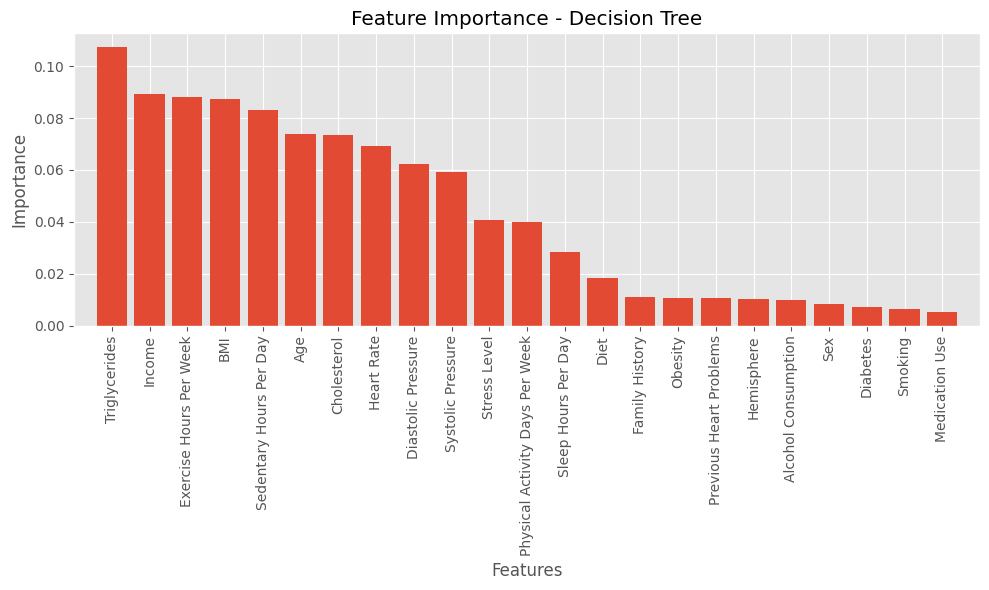

Logistic Regression - Accuracy: 0.64, Recall: 0.64, F1 Score: 0.50


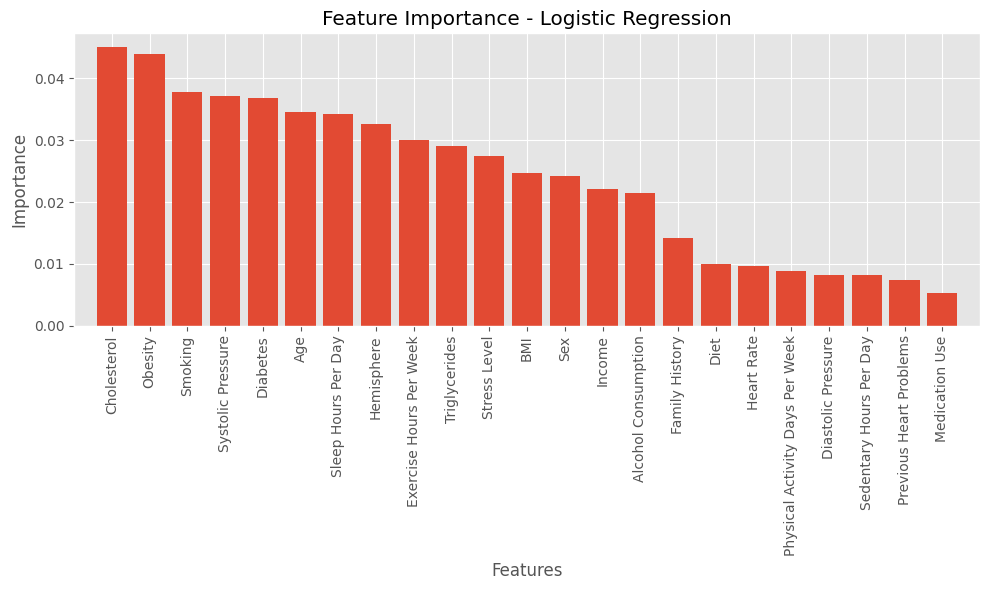

XGBoost - Accuracy: 0.60, Recall: 0.60, F1 Score: 0.56


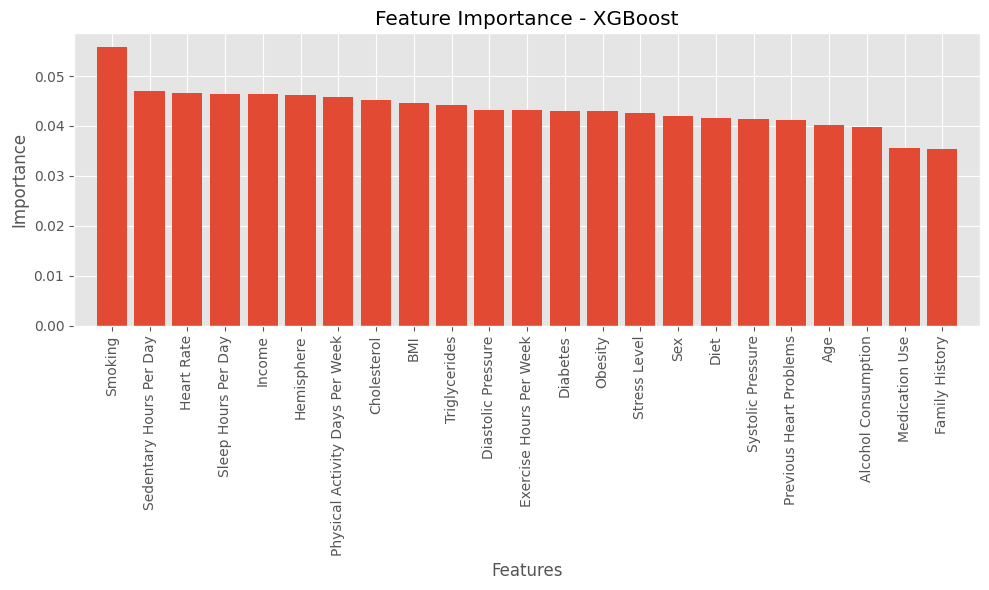

Random Forest - Accuracy: 0.63, Recall: 0.63, F1 Score: 0.51


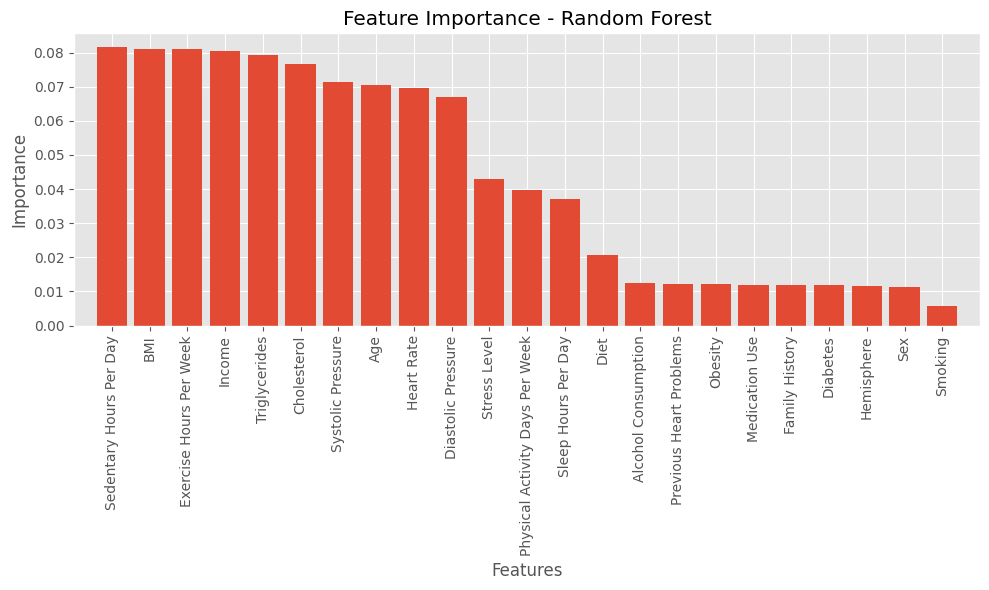

In [ ]:
# Train and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')  # Calculate Recall with weighted averaging
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score with weighted averaging

    print(f"{name} - Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    # Extract feature importances or coefficients
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        importances = model.named_steps['classifier'].feature_importances_
    elif name == 'Logistic Regression':
        importances = model.named_steps['classifier'].coef_[0]  # Get the coefficients
    else:
        importances = None

    # Plot feature importance
    if importances is not None:
        feature_names = X_train.columns  # Assuming X_train is a DataFrame
        indices = np.argsort(np.abs(importances))[::-1]  # Sort based on absolute values

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance - {name}')
        plt.bar(range(len(importances)), np.abs(importances)[indices], align='center')
        plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
        plt.xlim([-1, len(importances)])
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()


In [ ]:
# Store feature importances
feature_importances = {}

# Train and evaluate each classifier to get feature importances
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')  # Calculate Recall with weighted averaging
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score with weighted averaging

    print(f"{name} - Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    # Extract feature importances or coefficients
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        importances = model.named_steps['classifier'].feature_importances_
    elif name == 'Logistic Regression':
        importances = model.named_steps['classifier'].coef_[0]  # Get the coefficients
    else:
        importances = None

    # Store importances for later use
    feature_importances[name] = importances

# Create a new DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Decision Tree': feature_importances['Decision Tree'],
    'Logistic Regression': feature_importances['Logistic Regression'],
    'XGBoost': feature_importances['XGBoost'],
    'Random Forest': feature_importances['Random Forest']
})

# Identify the top 10 features for each model
top_features = {}
for name in classifiers.keys():
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        top_n = importance_df.nlargest(10, name)
    elif name == 'Logistic Regression':
        abs_importances = np.abs(importance_df[name])
        top_n = importance_df.loc[abs_importances.nlargest(10).index]

    top_features[name] = top_n['Feature'].values

# Create a new DataFrame to hold the top features
X_train_top = X_train[top_features['Decision Tree']]
X_test_top = X_test[top_features['Decision Tree']]

# Train the models again using only the top features
for name in classifiers.keys():
    if name == 'Decision Tree':
        X_train_selected = X_train[top_features[name]]
        X_test_selected = X_test[top_features[name]]
    else:
        # Use the same top features for all classifiers
        X_train_selected = X_train[top_features['Decision Tree']]
        X_test_selected = X_test[top_features['Decision Tree']]

    model = classifiers[name]
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')  # Calculate Recall with weighted averaging
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score with weighted averaging

    print(f"After feature selection - {name} - Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Decision Tree - Accuracy: 0.54, Recall: 0.54, F1 Score: 0.55
Logistic Regression - Accuracy: 0.64, Recall: 0.64, F1 Score: 0.50
XGBoost - Accuracy: 0.60, Recall: 0.60, F1 Score: 0.56
Random Forest - Accuracy: 0.63, Recall: 0.63, F1 Score: 0.51
After feature selection - Decision Tree - Accuracy: 0.53, Recall: 0.53, F1 Score: 0.53
After feature selection - Logistic Regression - Accuracy: 0.64, Recall: 0.64, F1 Score: 0.50
After feature selection - XGBoost - Accuracy: 0.58, Recall: 0.58, F1 Score: 0.55
After feature selection - Random Forest - Accuracy: 0.64, Recall: 0.64, F1 Score: 0.53


We evaluate heart attack risk models based on Recall and F1-score because it's critical to identify as many at-risk individuals as possible (high Recall) to avoid missing potential heart attacks. The F1-score balances Recall and Precision, ensuring the model accurately detects risks without generating too many false alarms, which is vital in healthcare settings.

**Only RF Model improved, and now has the highest F1 & Recall values. Let's use Hyperparameter tuning (Grid Search) !**

In [ ]:
# Extract feature importances for Random Forest to select top features
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Select the top 10 features based on importance
top_features_rf = importance_df.nlargest(10, 'Importance')['Feature'].values

# Filter the training and test sets to only include these top features
X_train_top_rf = X_train[top_features_rf]
X_test_top_rf = X_test[top_features_rf]

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='f1_weighted', cv=3, verbose=2)

# Fit the model using only the top features selected from Random Forest
grid_search.fit(X_train_top_rf, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

# Optionally, evaluate the best estimator on the test set
best_rf_model = grid_search.best_estimator_
y_pred_test = best_rf_model.predict(X_test_top_rf)

# Calculate accuracy and F1 score on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the results together
print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_f1_score:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}, Test F1 Score: {f1_test:.2f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END ma

**Handling imbalanced data with SMOTE**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Store feature importances
feature_importances = {}

# Train and evaluate each classifier to get feature importances
for name, model in classifiers.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')  # Calculate Recall with weighted averaging
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score with weighted averaging

    print(f"{name} - Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    # Extract feature importances or coefficients
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        importances = model.named_steps['classifier'].feature_importances_
    elif name == 'Logistic Regression':
        importances = model.named_steps['classifier'].coef_[0]  # Get the coefficients
    else:
        importances = None

    # Store importances for later use
    feature_importances[name] = importances

# Create a new DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Decision Tree': feature_importances.get('Decision Tree', np.nan),
    'Logistic Regression': feature_importances.get('Logistic Regression', np.nan),
    'XGBoost': feature_importances.get('XGBoost', np.nan),
    'Random Forest': feature_importances.get('Random Forest', np.nan)
})

# Identify the top 10 features for each model
top_features = {}
for name in classifiers.keys():
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        top_n = importance_df.nlargest(10, name)
    elif name == 'Logistic Regression':
        abs_importances = np.abs(importance_df[name])
        top_n = importance_df.loc[abs_importances.nlargest(10).index]

    top_features[name] = top_n['Feature'].values

# Create a new DataFrame to hold the top features
X_train_top = X_train[top_features['Decision Tree']]
X_test_top = X_test[top_features['Decision Tree']]

# Train the models again using only the top features
for name in classifiers.keys():
    if name == 'Decision Tree':
        X_train_selected = X_train[top_features[name]]
        X_test_selected = X_test[top_features[name]]
    else:
        # Use the same top features for all classifiers
        X_train_selected = X_train[top_features['Decision Tree']]
        X_test_selected = X_test[top_features['Decision Tree']]

    model = classifiers[name]
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')  # Calculate Recall with weighted averaging
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score with weighted averaging

    print(f"After feature selection - {name} - Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Decision Tree - Accuracy: 0.52, Recall: 0.52, F1 Score: 0.53
Logistic Regression - Accuracy: 0.53, Recall: 0.53, F1 Score: 0.53
XGBoost - Accuracy: 0.57, Recall: 0.57, F1 Score: 0.56
Random Forest - Accuracy: 0.58, Recall: 0.58, F1 Score: 0.55
After feature selection - Decision Tree - Accuracy: 0.54, Recall: 0.54, F1 Score: 0.54
After feature selection - Logistic Regression - Accuracy: 0.64, Recall: 0.64, F1 Score: 0.50
After feature selection - XGBoost - Accuracy: 0.60, Recall: 0.60, F1 Score: 0.56
After feature selection - Random Forest - Accuracy: 0.63, Recall: 0.63, F1 Score: 0.53


**Models ROC Curves**

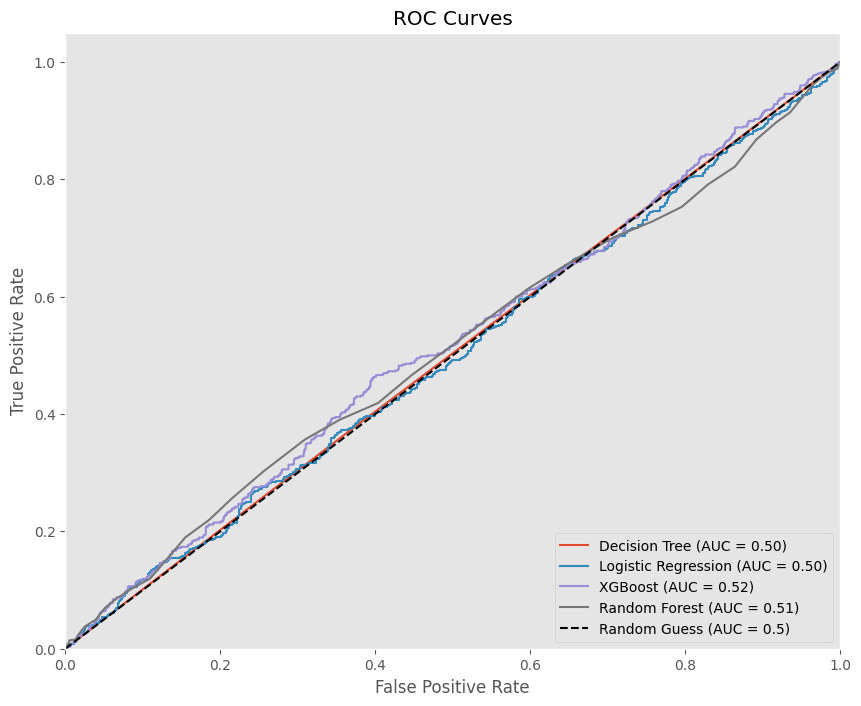

In [ ]:
# Store the models and their predictions
model_predictions = {}
model_fprs = {}
model_tprs = {}
model_aucs = {}

# Train each model and store predictions for ROC curve
for name, model in classifiers.items():
    # Fit the model
    model.fit(X_train_top, y_train)

    # Get the probability predictions for the positive class
    y_proba = model.predict_proba(X_test_top)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Store results for plotting
    model_predictions[name] = y_proba
    model_fprs[name] = fpr
    model_tprs[name] = tpr
    model_aucs[name] = roc_auc

# Plotting
plt.figure(figsize=(10, 8))

for name in classifiers.keys():
    plt.plot(model_fprs[name], model_tprs[name], label=f'{name} (AUC = {model_aucs[name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Conclusion**

Several classifier models were developed using the Heart Attack Risk dataset. In the data preprocessing stage, one-hot encoding was applied to categorical variables, and oversampling techniques were used to handle data imbalance. The dataset was split into training and test sets to ensure the reliability of model evaluation.

Random Forest emerged as the best-performing model after focusing on top features and conducting hyperparameter tuning, achieving the highest Recall and F1 scores, which aligned with our business objectives. However, despite efforts in addressing data imbalance, tuning hyperparameters, and analyzing feature importance, the overall performance improvement was modest.

These findings highlight the challenges of predictive modeling in healthcare, where even advanced techniques may yield limited gains. Nonetheless, the insights gained from this analysis can contribute valuable knowledge to the healthcare community, which continues to face difficulties in accurately predicting critical conditions like heart attacks.